In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA
from matplotlib.path import get_path_collection_extents
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import make_blobs
from tqdm import tqdm_notebook as tqdm
from scipy.cluster import hierarchy
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin
from sklearn.metrics import silhouette_score

In [2]:
dfold = pd.read_csv('Vitrina_NEW_ITOG.csv', sep=';', encoding='utf-8-sig') #read our ABT

/Users/natalyakrauze/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (35,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = dfold.values
print(data.shape)

(65928, 74)


We check our data because the python works with numbers, excel sometimes writes data as strings

In [4]:
d = dict()
i = 0
for el in list(dfold.columns):
    d[el] = list(dfold.dtypes)[i]
    i += 1
d

{'ID': dtype('O'),
 'КоличествоЧеков': dtype('int64'),
 'Среднийчек': dtype('int64'),
 'СреднееЧислоТоваровЧека': dtype('int64'),
 'Выручка': dtype('int64'),
 'КоличествоТоваров': dtype('int64'),
 'СредняяМаржа ТЕСТ': dtype('O'),
 'ВыручкаВсе': dtype('int64'),
 'КоличествоТоваровВсе': dtype('int64'),
 'СредняяМаржаВсе ТЕСТ': dtype('O'),
 'ПроцентОтмен (в процентах)': dtype('int64'),
 'Доля выкупленных ТЕСТ': dtype('O'),
 'ДЕТСКОЕ ПИТАНИЕ ТЕСТ': dtype('O'),
 'ЖЕНСКИЕ ШТУЧКИ ТЕСТ': dtype('O'),
 'ИГРУШКИ ТЕСТ': dtype('O'),
 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ ТЕСТ': dtype('O'),
 'КОСМЕТИКА/ГИГИЕНА ТЕСТ': dtype('O'),
 'КРУПНОГАБАРИТНЫЙ ТОВАР ТЕСТ': dtype('O'),
 'ОБУВЬ ТЕСТ': dtype('O'),
 'ПОДГУЗНИКИ ТЕСТ': dtype('O'),
 'СОПУТСТВУЮЩИЕ ТОВАРЫ ТЕСТ': dtype('O'),
 'ТЕКСТИЛЬ, ТРИКОТАЖ ТЕСТ': dtype('O'),
 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА ТЕСТ': dtype('O'),
 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ ТЕСТ': dtype('O'),
 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ ТЕСТ': dtype('O'),
 'ИГРУШКИ ТЕСТ.1': dtype('O'),
 'ИНОЕ ТЕСТ': dtype('O'),
 'КГТ ТЕСТ': dtyp

In [5]:
list(dfold.columns)

['ID',
 'КоличествоЧеков',
 'Среднийчек',
 'СреднееЧислоТоваровЧека',
 'Выручка',
 'КоличествоТоваров',
 'СредняяМаржа ТЕСТ',
 'ВыручкаВсе',
 'КоличествоТоваровВсе',
 'СредняяМаржаВсе ТЕСТ',
 'ПроцентОтмен (в процентах)',
 'Доля выкупленных ТЕСТ',
 'ДЕТСКОЕ ПИТАНИЕ ТЕСТ',
 'ЖЕНСКИЕ ШТУЧКИ ТЕСТ',
 'ИГРУШКИ ТЕСТ',
 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ ТЕСТ',
 'КОСМЕТИКА/ГИГИЕНА ТЕСТ',
 'КРУПНОГАБАРИТНЫЙ ТОВАР ТЕСТ',
 'ОБУВЬ ТЕСТ',
 'ПОДГУЗНИКИ ТЕСТ',
 'СОПУТСТВУЮЩИЕ ТОВАРЫ ТЕСТ',
 'ТЕКСТИЛЬ, ТРИКОТАЖ ТЕСТ',
 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА ТЕСТ',
 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ ТЕСТ',
 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ ТЕСТ',
 'ИГРУШКИ ТЕСТ.1',
 'ИНОЕ ТЕСТ',
 'КГТ ТЕСТ',
 'ОДЕЖДА ТЕСТ',
 'ППКП ТЕСТ',
 'Курьерская ТЕСТ',
 'Магазины ТЕСТ',
 'Самовывоз ТЕСТ',
 'Транспортная компания ТЕСТ',
 'DPD ТЕСТ',
 'Pick point ТЕСТ',
 'Не указан способ доставки ТЕСТ',
 'Безналичная ТЕСТ',
 'Наличная ТЕСТ',
 'Не указан способ оплаты ТЕСТ',
 'МО ТЕСТ',
 'Москва ТЕСТ',
 'Регионы ТЕСТ',
 'Доля выкупленных',
 'ДЕТСКОЕ ПИТАНИЕ',
 'ЖЕНСКИЕ ШТУЧКИ

Delete unnecessary columns in the database after editing in excel. 

In [6]:
dfold.drop(['ID',
 'СредняяМаржа ТЕСТ',
 'СредняяМаржаВсе ТЕСТ',
 'Доля выкупленных ТЕСТ',
 'ДЕТСКОЕ ПИТАНИЕ ТЕСТ',
 'ЖЕНСКИЕ ШТУЧКИ ТЕСТ',
 'ИГРУШКИ ТЕСТ',
 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ ТЕСТ',
 'КОСМЕТИКА/ГИГИЕНА ТЕСТ',
 'КРУПНОГАБАРИТНЫЙ ТОВАР ТЕСТ',
 'ОБУВЬ ТЕСТ',
 'ПОДГУЗНИКИ ТЕСТ',
 'СОПУТСТВУЮЩИЕ ТОВАРЫ ТЕСТ',
 'ТЕКСТИЛЬ, ТРИКОТАЖ ТЕСТ',
 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА ТЕСТ',
 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ ТЕСТ',
 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ ТЕСТ',
 'ИГРУШКИ ТЕСТ.1',
 'ИНОЕ ТЕСТ',
 'КГТ ТЕСТ',
 'ОДЕЖДА ТЕСТ',
 'ППКП ТЕСТ',
 'Курьерская ТЕСТ',
 'Магазины ТЕСТ',
 'Самовывоз ТЕСТ',
 'Транспортная компания ТЕСТ',
 'DPD ТЕСТ',
 'Pick point ТЕСТ',
 'Не указан способ доставки ТЕСТ',
 'Безналичная ТЕСТ',
 'Наличная ТЕСТ',
 'Не указан способ оплаты ТЕСТ',
 'МО ТЕСТ',
 'Москва ТЕСТ',
 'Регионы ТЕСТ',], axis=1, inplace=True)

Fill in the missing values with zeros to make it easier to work.

In [7]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [8]:
dfold = DataFrameImputer().fit_transform(dfold)

In [9]:
dfold

,КоличествоЧеков,Среднийчек,СреднееЧислоТоваровЧека,Выручка,КоличествоТоваров,ВыручкаВсе,КоличествоТоваровВсе,ПроцентОтмен (в процентах),Доля выкупленных,ДЕТСКОЕ ПИТАНИЕ,...,Самовывоз,DPD,Pick point,Безналичная,Наличная,МО,Москва,Регионы,СредняяМаржа,СредняяМаржаВсе
0,1,5215,1,5166,1,5166,1,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-705.0,-705.0
1,1,1096,2,997,2,997,2,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,262.0,262.0
2,1,1345,1,1345,1,1345,1,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-186.0,-186.0
3,1,362,1,313,1,313,1,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,21.0,21.0
4,1,17149,1,17000,1,17000,1,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4446.0,4446.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65923,1,2094,4,1995,4,1995,4,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,370.0,370.0
65924,1,498,1,399,1,399,1,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,63.0,63.0
65925,1,6319,1,6270,1,6270,1,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,570.0,570.0
65926,1,11088,1,10989,1,10989,1,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2539.0,2539.0


In [10]:
#dfold = dfold.fillna(0)
#data = dfold.values
#dfold

# Normalization

### StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.


In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfold)

In [12]:
df = pd.DataFrame(scaled_data)
df.columns = ['КоличествоЧеков',
 'Среднийчек',
 'СреднееЧислоТоваровЧека',
 'Выручка',
 'КоличествоТоваров',
 'ВыручкаВсе',
 'КоличествоТоваровВсе',
 'ПроцентОтмен (в процентах)',
 'Доля выкупленных',
 'ДЕТСКОЕ ПИТАНИЕ',
 'ЖЕНСКИЕ ШТУЧКИ',
 'ИГРУШКИ',
 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ',
 'КОСМЕТИКА/ГИГИЕНА',
 'КРУПНОГАБАРИТНЫЙ ТОВАР',
 'ОБУВЬ',
 'ПОДГУЗНИКИ',
 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
 'ТЕКСТИЛЬ, ТРИКОТАЖ',
 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ',
 'ИГРУШКИ.1',
 'ИНОЕ',
 'КГТ',
 'ОДЕЖДА',
 'ППКП',
 'Курьерская',
 'Магазины',
 'Самовывоз',
 'DPD',
 'Pick point',
 'Безналичная',
 'Наличная',
 'МО',
 'Москва',
 'Регионы',
 'СредняяМаржа',
 'СредняяМаржаВсе']

In [13]:
df

,КоличествоЧеков,Среднийчек,СреднееЧислоТоваровЧека,Выручка,КоличествоТоваров,ВыручкаВсе,КоличествоТоваровВсе,ПроцентОтмен (в процентах),Доля выкупленных,ДЕТСКОЕ ПИТАНИЕ,...,Самовывоз,DPD,Pick point,Безналичная,Наличная,МО,Москва,Регионы,СредняяМаржа,СредняяМаржаВсе
0,-0.374726,0.433831,-0.508635,0.233007,-0.472889,0.166572,-0.464678,-0.41061,0.265702,-0.321454,...,-0.1145,-0.017191,-0.033592,0.151331,-0.151331,-0.372173,1.604753,-1.221990,-0.626182,-0.607185
1,-0.374726,-0.483095,-0.253015,-0.527327,-0.318222,-0.539398,-0.333556,-0.41061,0.265702,-0.321454,...,-0.1145,-0.017191,-0.033592,0.151331,-0.151331,-0.372173,-0.630796,0.819449,-0.182253,-0.179851
2,-0.374726,-0.427666,-0.508635,-0.463859,-0.472889,-0.480468,-0.464678,-0.41061,0.265702,-0.321454,...,-0.1145,-0.017191,-0.033592,0.151331,-0.151331,-0.372173,-0.630796,0.819449,-0.387920,-0.377830
3,-0.374726,-0.646490,-0.508635,-0.652073,-0.472889,-0.655225,-0.464678,-0.41061,0.265702,-0.321454,...,-0.1145,-0.017191,-0.033592,0.151331,-0.151331,-0.372173,1.604753,-1.221990,-0.292891,-0.286353
4,-0.374726,3.090445,-0.508635,2.391268,-0.472889,2.170516,-0.464678,-0.41061,0.265702,-0.321454,...,-0.1145,-0.017191,-0.033592,0.151331,-0.151331,-0.372173,-0.630796,0.819449,1.738531,1.669133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65923,-0.374726,-0.260932,0.258226,-0.345314,-0.008889,-0.370399,-0.071313,-0.41061,0.265702,-0.321454,...,-0.1145,-0.017191,-0.033592,0.151331,-0.151331,-0.372173,-0.630796,0.819449,-0.132673,-0.132123
65924,-0.374726,-0.616215,-0.508635,-0.636389,-0.472889,-0.640662,-0.464678,-0.41061,0.265702,-0.321454,...,-0.1145,-0.017191,-0.033592,0.151331,-0.151331,-0.372173,-0.630796,0.819449,-0.273610,-0.267792
65925,-0.374726,0.679591,-0.508635,0.434352,-0.472889,0.353521,-0.464678,-0.41061,0.265702,-0.321454,...,-0.1145,-0.017191,-0.033592,0.151331,-0.151331,2.748996,-0.630796,-1.221990,-0.040857,-0.043740
65926,-0.374726,1.741213,-0.508635,1.294994,-0.472889,1.152626,-0.464678,-0.41061,0.265702,-0.321454,...,-0.1145,-0.017191,-0.033592,0.151331,-0.151331,2.748996,-0.630796,-1.221990,0.863068,0.826396


## CORELLATION 

Here we will create correlation table based on the Pearson correlation matrix.

In [14]:
df.corr()

,КоличествоЧеков,Среднийчек,СреднееЧислоТоваровЧека,Выручка,КоличествоТоваров,ВыручкаВсе,КоличествоТоваровВсе,ПроцентОтмен (в процентах),Доля выкупленных,ДЕТСКОЕ ПИТАНИЕ,...,Самовывоз,DPD,Pick point,Безналичная,Наличная,МО,Москва,Регионы,СредняяМаржа,СредняяМаржаВсе
КоличествоЧеков,1.000000,-0.029916,0.083896,0.330264,0.525231,0.340616,0.502513,0.871217,-0.052437,0.130092,...,0.020263,0.001928,-0.003928,-0.013201,0.013201,0.053831,0.011592,-0.045795,0.012256,0.006574
Среднийчек,-0.029916,1.000000,0.076685,0.858843,0.046896,0.810351,0.041154,-0.029073,0.018654,-0.014014,...,-0.011082,0.006096,0.009695,0.012243,-0.012243,-0.032964,-0.118684,0.129939,0.483604,0.455453
СреднееЧислоТоваровЧека,0.083896,0.076685,1.000000,0.110018,0.789975,0.120832,0.716877,0.102096,-0.018967,0.225364,...,0.000754,0.007106,0.009804,-0.011499,0.011499,0.030128,0.019561,-0.037568,0.010447,0.006513
Выручка,0.330264,0.858843,0.110018,1.000000,0.258235,0.956524,0.244149,0.285149,-0.003356,0.045876,...,-0.002039,0.006971,0.007288,0.004934,-0.004934,-0.014420,-0.099659,0.100438,0.421894,0.395344
КоличествоТоваров,0.525231,0.046896,0.789975,0.258235,1.000000,0.271967,0.919853,0.481117,-0.035590,0.240757,...,0.008418,0.006675,0.004525,-0.014665,0.014665,0.045238,0.018624,-0.046596,0.008492,0.003276
ВыручкаВсе,0.340616,0.810351,0.120832,0.956524,0.271967,1.000000,0.330143,0.392346,-0.179545,0.053328,...,0.036015,0.031030,0.029597,-0.104946,0.104946,-0.009477,-0.080933,0.080104,0.397632,0.376421
КоличествоТоваровВсе,0.502513,0.041154,0.716877,0.244149,0.919853,0.330143,1.000000,0.597599,-0.284481,0.221487,...,0.060203,0.032097,0.033553,-0.149235,0.149235,0.045380,0.031429,-0.058382,0.006547,0.002911
ПроцентОтмен (в процентах),0.871217,-0.029073,0.102096,0.285149,0.481117,0.392346,0.597599,1.000000,-0.428194,0.119597,...,0.184205,0.022554,0.037794,-0.230657,0.230657,0.046823,0.020450,-0.049299,0.007039,0.004040
Доля выкупленных,-0.052437,0.018654,-0.018967,-0.003356,-0.035590,-0.179545,-0.284481,-0.428194,1.000000,-0.025355,...,-0.339436,-0.057242,-0.112504,0.554179,-0.554179,-0.011196,-0.043178,0.046752,0.012938,-0.008447
ДЕТСКОЕ ПИТАНИЕ,0.130092,-0.014014,0.225364,0.045876,0.240757,0.053328,0.221487,0.119597,-0.025355,1.000000,...,0.020848,0.003899,0.011247,-0.037186,0.037186,0.018009,0.044339,-0.052268,-0.040202,-0.034218


Create a correlation table with all parametres where we could see the most correlated variables( ot could be noticed from the scale to the right).

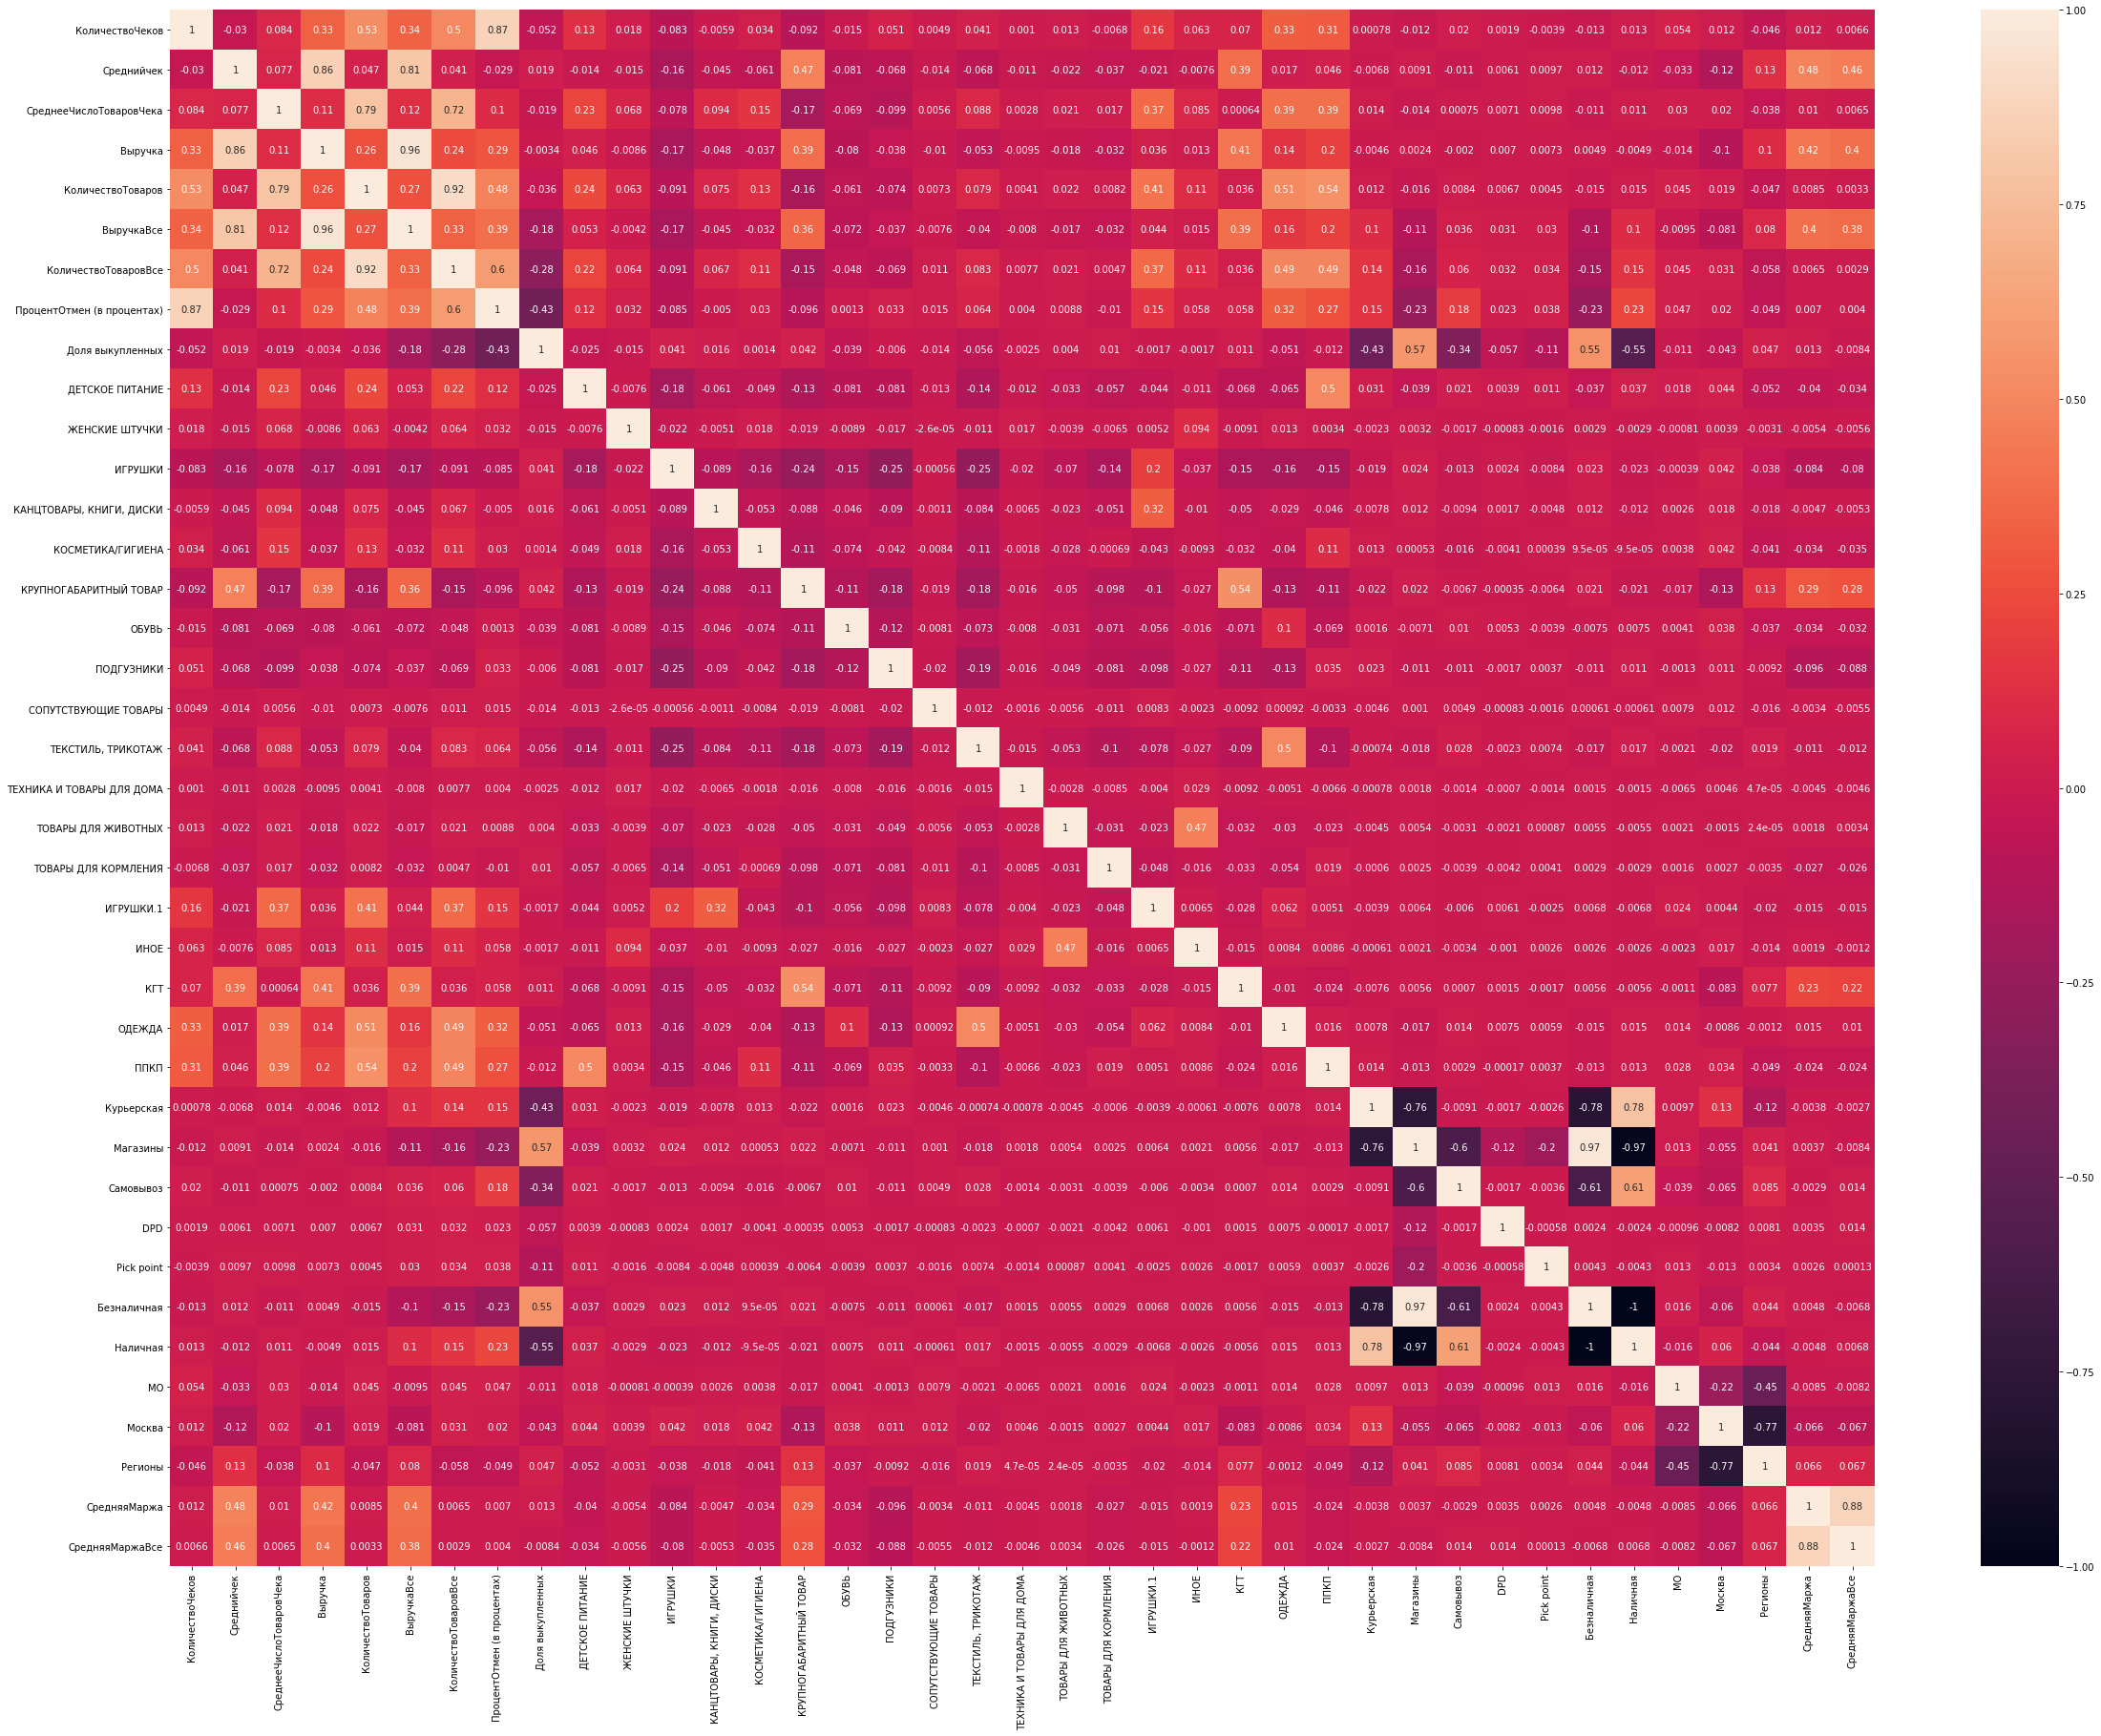

In [15]:
plt.figure(figsize=(40, 30))
sns.heatmap(df.corr(), annot=True)
plt.show()

The figure represents relationship-correlation between each variable in the data. The grading on the right shows how much the variables correlate by a rule: the lighter the color, the stronger the correlation. On the diagonal, we see only white squares-intersections as it is the dependence of the variable on itself (the correlation is equal to 1). 

In [16]:
def get_corr_cols(df, treshold):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k =1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > treshold)]
    return to_drop

def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1) 
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index 
    df_out = df_in[un_corr_idx] 
    return df_out

Delete the variables that depends to each other more than 60% as they could influence and remake k-means.

In [17]:
data_drop_corr = trimm_correlated(df, 0.6)

In [18]:
data_drop_corr.columns

Index(['КоличествоЧеков', 'Среднийчек', 'СреднееЧислоТоваровЧека',
       'Доля выкупленных', 'ДЕТСКОЕ ПИТАНИЕ', 'ЖЕНСКИЕ ШТУЧКИ', 'ИГРУШКИ',
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'КОСМЕТИКА/ГИГИЕНА',
       'КРУПНОГАБАРИТНЫЙ ТОВАР', 'ОБУВЬ', 'ПОДГУЗНИКИ', 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
       'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
       'ТОВАРЫ ДЛЯ ЖИВОТНЫХ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'ИГРУШКИ.1', 'ИНОЕ',
       'КГТ', 'ОДЕЖДА', 'ППКП', 'Курьерская', 'Самовывоз', 'DPD', 'Pick point',
       'МО', 'Москва', 'СредняяМаржа'],
      dtype='object')

In [19]:
df = data_drop_corr.values

In [20]:
df = pd.DataFrame(df)

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.374726,0.433831,-0.508635,0.265702,-0.321454,-0.048565,1.867113,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,1.604753,-0.626182
1,-0.374726,-0.483095,-0.253015,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,-0.422241,...,-0.296188,0.651866,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,-0.182253
2,-0.374726,-0.427666,-0.508635,0.265702,-0.321454,-0.048565,1.867113,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,-0.387920
3,-0.374726,-0.646490,-0.508635,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.190116,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,1.604753,-0.292891
4,-0.374726,3.090445,-0.508635,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,2.572573,...,0.949241,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,1.738531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65923,-0.374726,-0.260932,0.258226,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,0.161898,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,-0.132673
65924,-0.374726,-0.616215,-0.508635,0.265702,-0.321454,-0.048565,1.867113,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,-0.273610
65925,-0.374726,0.679591,-0.508635,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.190116,-0.101616,-0.1145,-0.017191,-0.033592,2.748996,-0.630796,-0.040857
65926,-0.374726,1.741213,-0.508635,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,2.572573,...,0.949241,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,2.748996,-0.630796,0.863068


In [22]:
df.columns = ['КоличествоЧеков', 
 'Среднийчек', 
 'СреднееЧислоТоваровЧека',
 'Доля выкупленных', 
 'ДЕТСКОЕ ПИТАНИЕ', 
 'ЖЕНСКИЕ ШТУЧКИ', 
 'ИГРУШКИ',
 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ',
 'КОСМЕТИКА/ГИГИЕНА',
 'КРУПНОГАБАРИТНЫЙ ТОВАР', 
 'ОБУВЬ',
 'ПОДГУЗНИКИ', 
 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
 'ТЕКСТИЛЬ, ТРИКОТАЖ',
 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ', 
 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 
 'ИГРУШКИ.1',
 'ИНОЕ',
 'КГТ', 
 'ОДЕЖДА', 
 'ППКП', 
 'Курьерская', 
 'Самовывоз', 
 'DPD', 
 'Pick point',
 'МО', 
 'Москва', 
 'СредняяМаржа']

In [23]:
df

,КоличествоЧеков,Среднийчек,СреднееЧислоТоваровЧека,Доля выкупленных,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,...,КГТ,ОДЕЖДА,ППКП,Курьерская,Самовывоз,DPD,Pick point,МО,Москва,СредняяМаржа
0,-0.374726,0.433831,-0.508635,0.265702,-0.321454,-0.048565,1.867113,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,1.604753,-0.626182
1,-0.374726,-0.483095,-0.253015,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,-0.422241,...,-0.296188,0.651866,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,-0.182253
2,-0.374726,-0.427666,-0.508635,0.265702,-0.321454,-0.048565,1.867113,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,-0.387920
3,-0.374726,-0.646490,-0.508635,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.190116,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,1.604753,-0.292891
4,-0.374726,3.090445,-0.508635,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,2.572573,...,0.949241,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,1.738531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65923,-0.374726,-0.260932,0.258226,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,0.161898,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,-0.132673
65924,-0.374726,-0.616215,-0.508635,0.265702,-0.321454,-0.048565,1.867113,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,-0.273610
65925,-0.374726,0.679591,-0.508635,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.190116,-0.101616,-0.1145,-0.017191,-0.033592,2.748996,-0.630796,-0.040857
65926,-0.374726,1.741213,-0.508635,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,2.572573,...,0.949241,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,2.748996,-0.630796,0.863068


## K-Means Elbow Method Code

We can easily run K-Means for a range of clusters using a for loop and collecting the distortions into a list.

In [320]:
Sum_of_squared_distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

### Plotting the distortions of K-Means



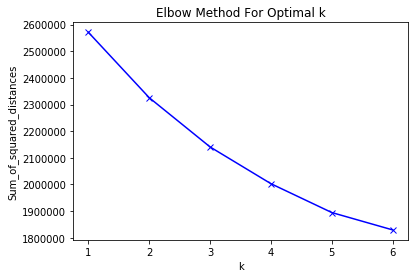

In [321]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# GAP statistic

In [38]:
def optimalK(data, nrefs=3, maxClusters=6):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
       # data: our array 
       # nrefs: number of sample reference datasets to create
       # maxClusters: Maximum number of clusters to test for

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf) 
    

In [39]:
k, gapdf = optimalK(df, nrefs=3, maxClusters=6)
print('Optimal k is: ', k)

Optimal k is:  5


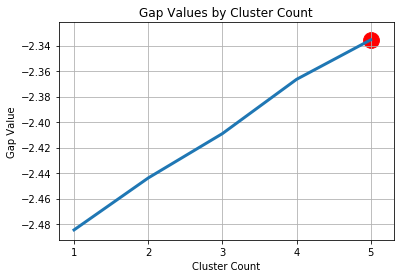

In [40]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

# PCA

In [399]:
new = df.to_numpy

In [400]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [401]:
print(pca.components_)

[[-0.1450887   0.43176576 -0.21699614  0.07583734 -0.14961562 -0.02998276
  -0.08907763 -0.07019939 -0.08096998  0.52838258 -0.04695908 -0.06072118
  -0.01381381 -0.11701686 -0.00788125 -0.02424482 -0.02365783 -0.14366587
  -0.04126627  0.41531044 -0.16276717 -0.17513722 -0.05643982 -0.02228174
  -0.00211118 -0.0071167  -0.0157584  -0.14766177  0.34500926]
 [ 0.32361843  0.27248622  0.44693612 -0.08229258  0.27178806  0.04091678
  -0.29316644  0.02269264  0.07002639  0.09901639 -0.0602987  -0.11270894
  -0.00545524  0.16003814 -0.00511596  0.00944768 -0.02158653  0.13663717
   0.06279257  0.2071216   0.35794922  0.3876015   0.04202136  0.04402951
   0.0136222   0.02254673  0.0460856  -0.05250967  0.20510826]]


In [402]:
print(pca.explained_variance_)

[2.43822166 2.14832825]


In [403]:
X_pca = pca.transform(df)
print("original shape:   ", df.shape)
print("transformed shape:", X_pca.shape)

original shape:    (65928, 29)
transformed shape: (65928, 2)


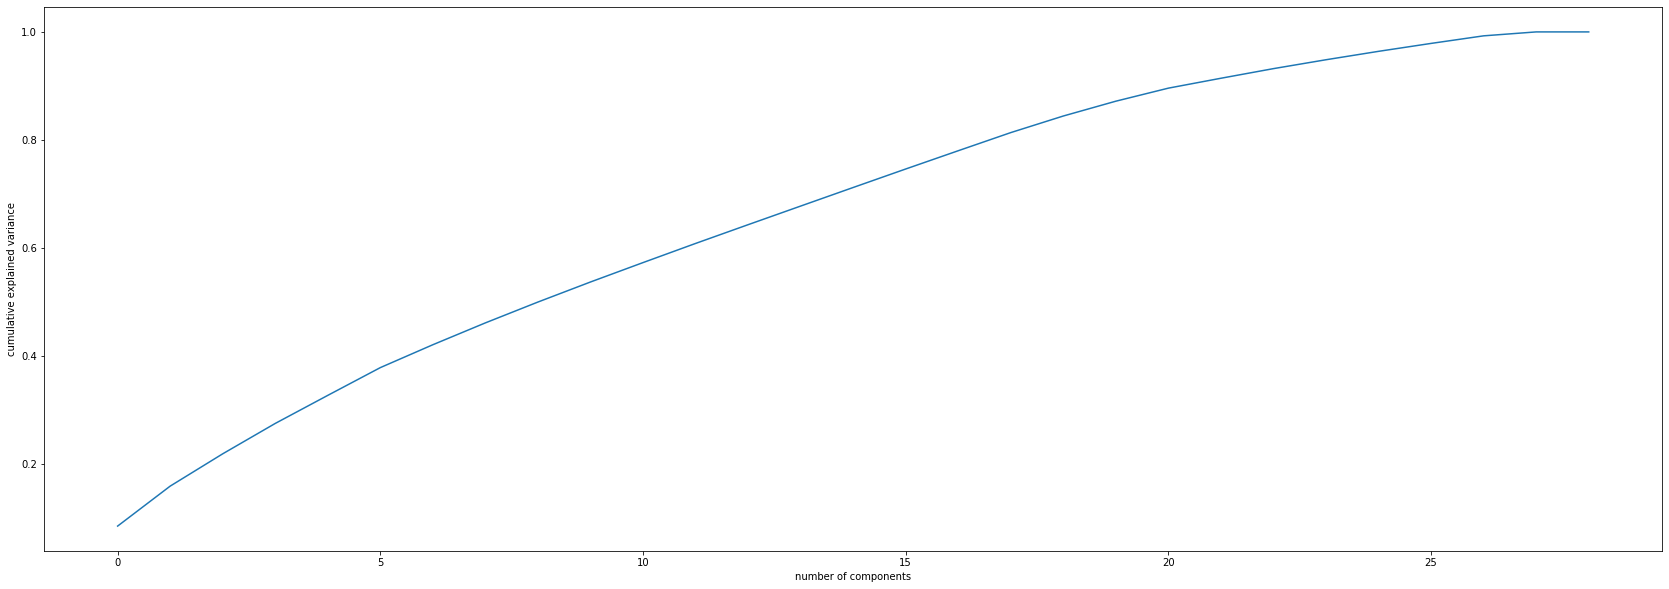

In [130]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

# K-MEANS


In [35]:
k = 4
kmeans = KMeans(n_clusters=k).fit(df)

In [36]:
kmeans.labels_

array([3, 1, 3, ..., 3, 2, 3], dtype=int32)

In [37]:
pca = PCA(n_components = 2); pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
data1 = pca.transform(df)
print(data1.shape)

(65928, 2)


In [39]:
colors = np.random.randint(0, 255, size=(k,4))/255
c_arr = np.array(list(map(lambda x: colors[x], list(kmeans.labels_))))

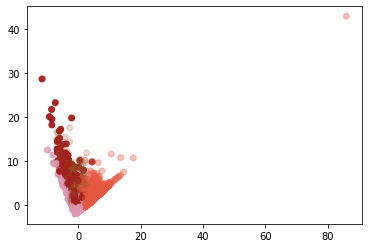

In [40]:
plt.scatter(data1[:, 0], data1[:, 1], c=c_arr)

In [41]:
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
cluster_5 = []
#cluster_6 = []
for i in range(data.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster_1.append(data[i])
    elif kmeans.labels_[i] == 1:
        cluster_2.append(data[i])
    elif kmeans.labels_[i] == 2:
        cluster_3.append(data[i])
    elif kmeans.labels_[i] == 3:
        cluster_4.append(data[i])
    elif kmeans.labels_[i] == 4:
        cluster_5.append(data[i])
#    elif kmeans.labels_[i] == 5:
#       cluster_6.append(data[i])

In [42]:
len(cluster_1)

5681

In [43]:
len(cluster_2)

14961

In [44]:
len(cluster_3)

9418

In [45]:
len(cluster_4)

35868

In [46]:
len(cluster_5)

0

# ADD CLUSTERS TO THE NOT NORMALIZED DF

In [36]:
df = pd.DataFrame(df)

In [37]:
kmeans.labels_

array([2, 0, 2, ..., 2, 1, 2], dtype=int32)

In [38]:
labels = pd.DataFrame(kmeans.labels_)
labels

,0
0,2
1,0
2,2
3,2
4,1
...,...
65923,2
65924,2
65925,2
65926,1


In [666]:
dfold['Кластер'] = labels

In [667]:
dfold

,КоличествоЧеков,Среднийчек,СреднееЧислоТоваровЧека,Выручка,КоличествоТоваров,ВыручкаВсе,КоличествоТоваровВсе,ПроцентОтмен (в процентах),Доля выкупленных,ДЕТСКОЕ ПИТАНИЕ,...,DPD,Pick point,Безналичная,Наличная,МО,Москва,Регионы,СредняяМаржа,СредняяМаржаВсе,Кластер
0,1,5215,1,5166,1,5166,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-705.0,-705.0,2
1,1,1096,2,997,2,997,2,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,262.0,262.0,1
2,1,1345,1,1345,1,1345,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-186.0,-186.0,2
3,1,362,1,313,1,313,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,21.0,21.0,1
4,1,17149,1,17000,1,17000,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4446.0,4446.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65923,1,2094,4,1995,4,1995,4,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,370.0,370.0,2
65924,1,498,1,399,1,399,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,63.0,63.0,2
65925,1,6319,1,6270,1,6270,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,570.0,570.0,1
65926,1,11088,1,10989,1,10989,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2539.0,2539.0,3


In [107]:
dfold.to_csv('final_clusters#4.csv', index=False, sep=';', encoding='utf-8-sig')

# Pivot table ( average values )

In [668]:
means = dfold.groupby('Кластер').mean()

In [669]:
means

,КоличествоЧеков,Среднийчек,СреднееЧислоТоваровЧека,Выручка,КоличествоТоваров,ВыручкаВсе,КоличествоТоваровВсе,ПроцентОтмен (в процентах),Доля выкупленных,ДЕТСКОЕ ПИТАНИЕ,...,Самовывоз,DPD,Pick point,Безналичная,Наличная,МО,Москва,Регионы,СредняяМаржа,СредняяМаржаВсе
Кластер,,,,,,,,,,,,,,,,,,,,,
0,1.677692,3230.204082,6.273751,5195.323012,10.052956,5748.017945,11.066151,1.858902,0.948273,0.814607,...,0.009129,0.000318,0.001365,0.976529,0.023471,0.140662,0.347830,0.511508,208.763705,273.413065
1,1.330484,2330.692888,3.585531,2932.500955,4.929429,3329.330075,5.681339,1.498954,0.946608,0.008472,...,0.007921,0.000195,0.000775,0.984105,0.015895,0.122631,0.295221,0.582148,432.409722,446.477958
2,1.210906,2183.512229,2.391395,2516.399293,2.977240,2696.002217,3.253932,1.287051,0.970915,0.008440,...,0.004175,0.000177,0.000425,0.990343,0.009657,0.117454,0.308107,0.574439,237.843293,264.332162
3,1.123908,8809.350842,1.445664,9556.139996,1.705838,9803.941828,1.896015,1.179629,0.977060,0.003363,...,0.004927,0.000123,0.000284,0.992078,0.007922,0.103825,0.132033,0.764142,2757.795049,2674.313688


In [670]:
means.to_csv('Проверка.csv', index=False, sep=';', encoding='utf-8-sig')